In [100]:
file_path =("/home/sujin/Exercises/Study_reference/names.txt" )
words = open(file_path,"r").read().splitlines()
             

In [101]:
len(words)

32033

In [102]:
min(len(w) for w in words)

2

In [103]:
max(len(w) for w in words)

15

In [104]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [105]:
b = {}
for w in words:
    # print( w )
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs,chs[1:]):   # w = emma - w[1:] = mma.
        bigram =  (ch1, ch2)            # IN 1st iteatiion, from w we take 'e' and w[1:] we take 'm'.# During 2nd iteration, from w we take  'm'and w[1:] we take 'second m'
        b[bigram] =  b.get(bigram,0) + 1   # thiss takes the count of the specific bigram in the dictionary b.
        # print (ch1, ch2)

In [106]:
b  #made a bigram b 

{('<S>', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '<E>'): 6640,
 ('<S>', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('<S>', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('<S>', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('<S>', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('<S>', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '<E>'): 3983,
 ('<S>', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('<S>', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '<E>'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '<E>'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,


In [107]:
sorted(b.items(), key = lambda kv: -kv[1]) #this sorts the list according to the most occured bigram in the list
print(1)

#then we sorted the bigram acc. to the most occured.

1


In [108]:
#we need to store this into a 2d array 
import torch

In [109]:
N =  torch.zeros((27,27) , dtype = torch.int32)


In [110]:
#we need to convert the characters (a,b,c,d) into int
#so at first we create a alphabetic array. so we combine all characters and extract the unique from them.

In [111]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i ,s in enumerate(chars)}
stoi ['.'] = 0
itos = {i:s for s,i in stoi.items()}
# stoi ['<E>'] = 27
# stoi['s']
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [112]:
for w in words:
    chs= ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1] 
        ix2 = stoi[ch2]
        N[ix1, ix2] +=1

In [113]:
print (N)

tensor([[   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929],
        [6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435],
        [ 114,  321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,
          103,    0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,
            0,   83,    0],
        [  97,  815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,
          116,    0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,
            3,  104,    4],
        [ 516, 1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,
           60,   30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,
            0,  317,    1],
        [3983,  679,  121,  153,  384, 1271,   82,

In [114]:
# itos = {i:s for s,i in stoi.items()}
# itos
#itos is atakes bcos we have stoi but it is key= character and value = number. we need key = number and value = character so we can call the number and get character.

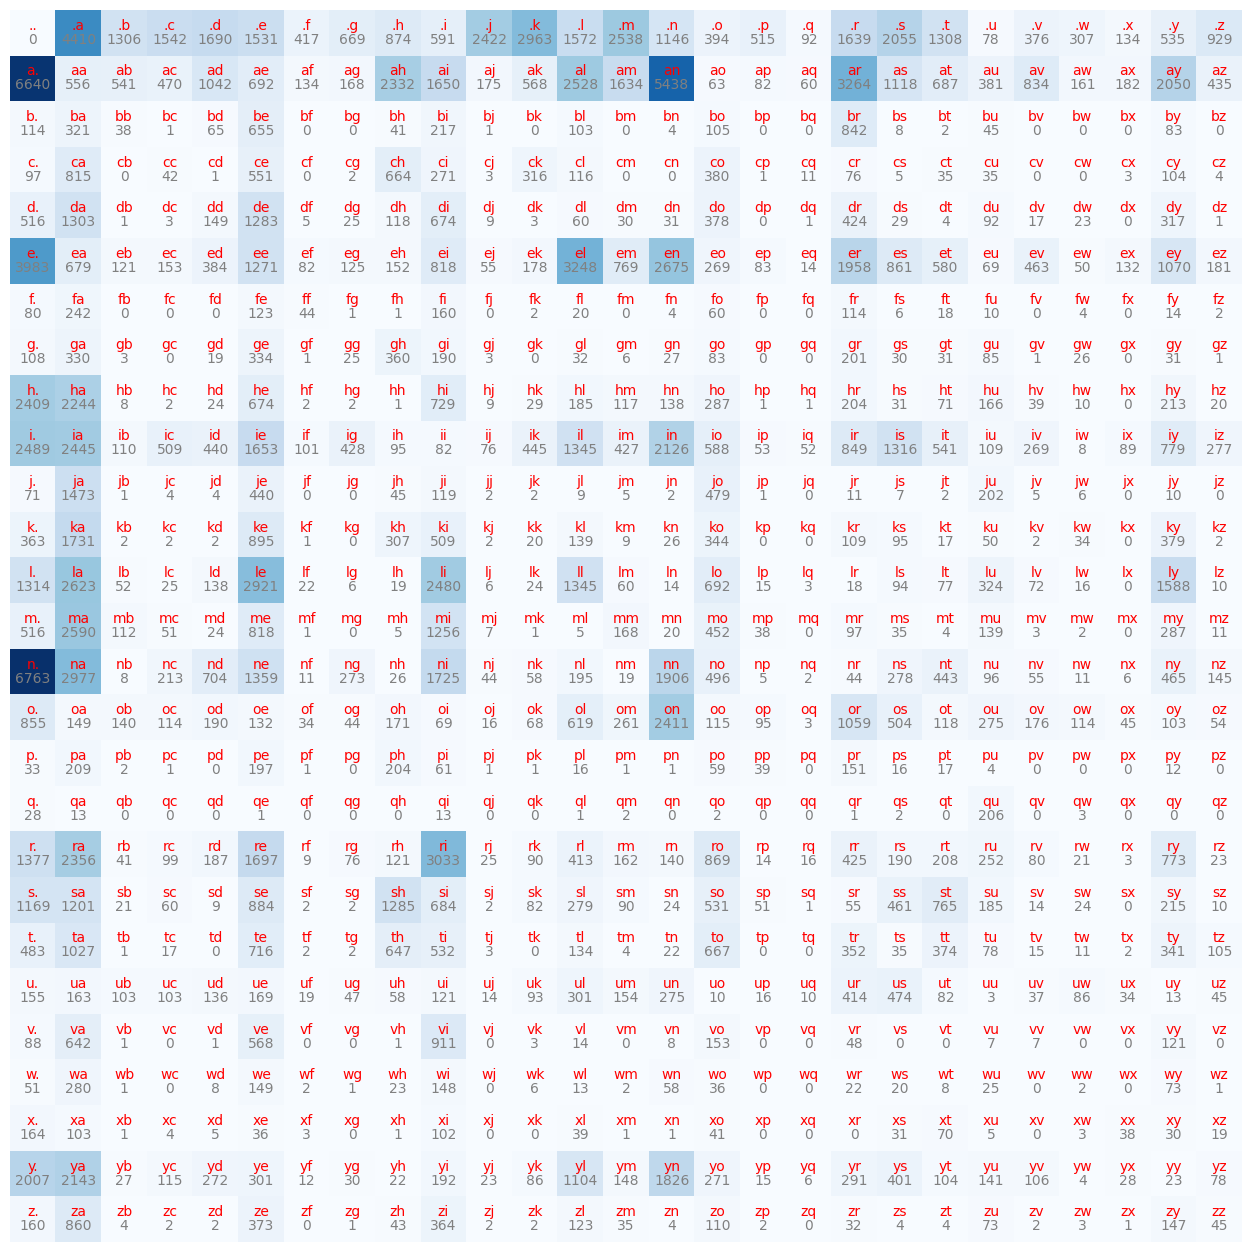

In [115]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure (figsize = (16,16))
plt.imshow(N, cmap = 'Blues')
for i in range (27):
    for j in range(27):
        chstr = itos[i]+itos[j]
        plt.text(j,i,chstr, ha="center", va = "bottom", color='red')
        plt.text(j,i, N[i,j].item(), ha="center", va = "top", color='gray')
    plt.axis('off');

In [116]:
N[0,:].shape

torch.Size([27])

In [117]:
#we will create probability vector 
p = N[0].float()
p = p/p.sum()  #probability. this gives the probability of any word which can be the first character of the word.
p  #sum of the p gives 1. 

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [118]:
# g = torch.Generator().manual_seed(457)

In [119]:
# ix = torch.multinomial(p,1,True,generator = g).item()
# itos[ix]  

In [120]:
# k = torch.tensor([0.1,0.1,0.2,0.3,0.2,0.1])
# b = torch.multinomial(k,8,False)
# b

In [134]:
P = (N+1).float()  #27 x 27
print(P)
# s = P.sum(1)

s =P.sum(1, keepdim = True) #[27 x 1] when keepdim=True
print(s, s.shape)
P /= s
#print(P[0].sum())
print(P.shape)

tensor([[1.0000e+00, 4.4110e+03, 1.3070e+03, 1.5430e+03, 1.6910e+03, 1.5320e+03,
         4.1800e+02, 6.7000e+02, 8.7500e+02, 5.9200e+02, 2.4230e+03, 2.9640e+03,
         1.5730e+03, 2.5390e+03, 1.1470e+03, 3.9500e+02, 5.1600e+02, 9.3000e+01,
         1.6400e+03, 2.0560e+03, 1.3090e+03, 7.9000e+01, 3.7700e+02, 3.0800e+02,
         1.3500e+02, 5.3600e+02, 9.3000e+02],
        [6.6410e+03, 5.5700e+02, 5.4200e+02, 4.7100e+02, 1.0430e+03, 6.9300e+02,
         1.3500e+02, 1.6900e+02, 2.3330e+03, 1.6510e+03, 1.7600e+02, 5.6900e+02,
         2.5290e+03, 1.6350e+03, 5.4390e+03, 6.4000e+01, 8.3000e+01, 6.1000e+01,
         3.2650e+03, 1.1190e+03, 6.8800e+02, 3.8200e+02, 8.3500e+02, 1.6200e+02,
         1.8300e+02, 2.0510e+03, 4.3600e+02],
        [1.1500e+02, 3.2200e+02, 3.9000e+01, 2.0000e+00, 6.6000e+01, 6.5600e+02,
         1.0000e+00, 1.0000e+00, 4.2000e+01, 2.1800e+02, 2.0000e+00, 1.0000e+00,
         1.0400e+02, 1.0000e+00, 5.0000e+00, 1.0600e+02, 1.0000e+00, 1.0000e+00,
         8.4300e+

In [135]:
#27, 27         broadcasting semantics
#27, 1

In [136]:
g = torch.Generator().manual_seed(457)
ix = 0

for i in range(10):
    out =[]
    while True:
        p = P[ix]
        # p = N[ix].float()   #takes the 1st row and do into float
        # p = p/p.sum()       #makes the probability list of the 1st row
        ix = torch.multinomial(p,1,True,generator = g).item()  #takes 1 index value from the above list
        #print(itos[ix])     #takes the equvalent character acc to the number
        out.append(itos[ix])
        if ix==0:           #when the index of '.' is taken , it exists the while loop
            break
    print(''.join(out))


josidon.
joyay.
rinns.
beludir.
ky.
aliziayncolesa.
zin.
selolima.
si.
ylelleolli.


###Evaluating the quality of the result

In [137]:
#Goa : maximize the likelihoof of the data w.r.t model parameters (statistical modeling)
#equivalent to maximizing the log likelihood(because log is monotonic). likelihood⬆️ - loglikelihood⬆️
#equivalent to minimizing the negative log likelihood. loglikelihood⬆️ - negative loglikelihood⬇️
#equivalent to minimizing the average negative log likelihood. negative loglikelihood⬇️ - AVG negative loglikelihood⬇️

In [140]:
log_likelihood = 0
n = 0
# for w in ["andrejq"]:
for w in words:
    chs = ['.']+ list(w) + ['.']    #w should be given as a list. 
    for ch1, ch2 in zip (chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1,ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        # print (f'{ch1}{ch2} : {prob:.4f} {logprob:.4f}')
print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'loss_fn= {nll/n}')  #it is  normalised by count. (avg) usually we use this as loss fn. we need this as small as possible

    

log_likelihood=tensor(-559951.5625)
nll=tensor(559951.5625)
loss_fn= 2.4543561935424805


**Create the training set of bigrams**

In [142]:
xs, ys = [], []
for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1 , ch2 in zip (chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1,ch2)
        xs.append(ix1)
        ys.append(ix2)

xs= torch.tensor(xs)
ys = torch.tensor(ys)


. e
e m
m m
m a
a .


In [143]:
print(xs)
print(ys)

tensor([ 0,  5, 13, 13,  1])
tensor([ 5, 13, 13,  1,  0])
